In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import instruments
import importlib
importlib.reload(instruments)
from instruments import MS2038_SPA
import scipy.signal

class Marker(object):
    @classmethod
    def find_peaks(cls, ary):
        x, y = ary[0], ary[1]
        i = scipy.signal.find_peaks(y)[0]
        j = np.argsort(y[i])
        return np.array([x[i][j], y[i][j]])
    
def extract_keys(o, label):
    return sorted(set([o[label] for o in data]),key=[o[label] for o in data].index)

def convert_plottable(o):
    lolist = extract_keys(o, 'LO')
    iflists = []
    tracelists = []
    for i in lolist:
        p = [j for j in o if j['LO'] == i]
        iflists.append(extract_keys(p, 'IF'))
        tracelist = []
        for q in p:
            tracelist.append(MS2038_SPA.new_array_freq_trace_pair(q, old_format=True))
        tracelists.append(tracelist)
    return {
        'TRACE': np.array(tracelists),
        'IF': np.array(iflists),
        'LO': np.array(lolist),
    }

QuBE Riken #1-4 Port 5


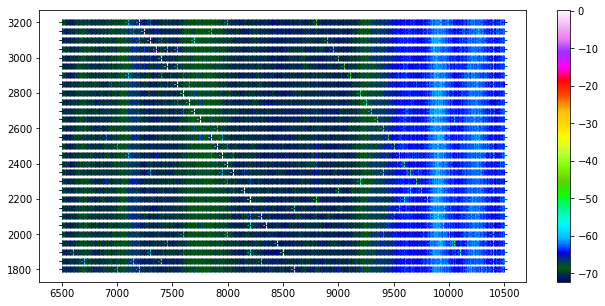

QuBE Riken #1-5 Port 5 VATT = 0xC00


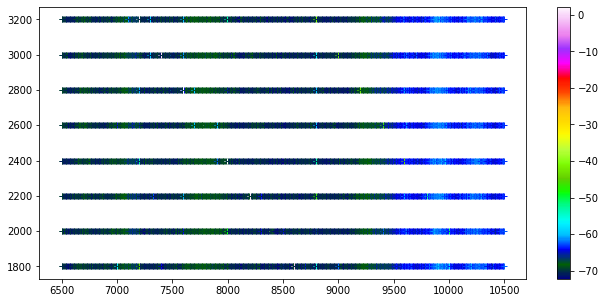

In [100]:
from matplotlib import cm
def plot_heat_spurious(fname):
    fig = plt.figure(figsize=(24,5))
    c = convert_plottable(data)
    ncol = len(c['LO'])
    # axs = [fig.add_subplot(1,ncol,i+1) for i in range(ncol)]
    axs = [fig.add_subplot(1,2,i+1) for i in range(1)]
    for j, fl, ax in zip(list(range(ncol)), c['LO'], axs):
        x, y = np.meshgrid(c['TRACE'][j,0,0,:], c['IF'][j,:])
        b = ax.scatter(x, y, c=c['TRACE'][j,:,1,:], cmap=plt.cm.get_cmap('gist_ncar'), marker='+',lw=1)
        #b = ax.pcolormesh(x, y, c['TRACE'][j,:,1,:], cmap='copper', vmin=-70, vmax=10)
        # for i, fi in enumerate(c['IF'][j,:]):
        #     ax.plot(c['TRACE'][j,i,0,:], c['TRACE'][j,i,1,:] + i * 40, 'b')
        #     ax.set_title('LO={}'.format(fl))
    fig.colorbar(b, ax=ax)


print('QuBE Riken #1-4 Port 5')
with open('../QuBE_Char/e7awg_sw/QubeRiken14_Port5.pickle', 'rb') as f:
    data = pickle.load(f)
plot_heat_spurious(data)
plt.show()

print('QuBE Riken #1-5 Port 5 VATT = 0xC00')
with open('../QuBE_Char/e7awg_sw/QubeRiken1_5_Port5_0xc00_coarse.pickle', 'rb') as f:
    data = pickle.load(f)
plot_heat_spurious(data)
plt.show()

QuBE Riken #15


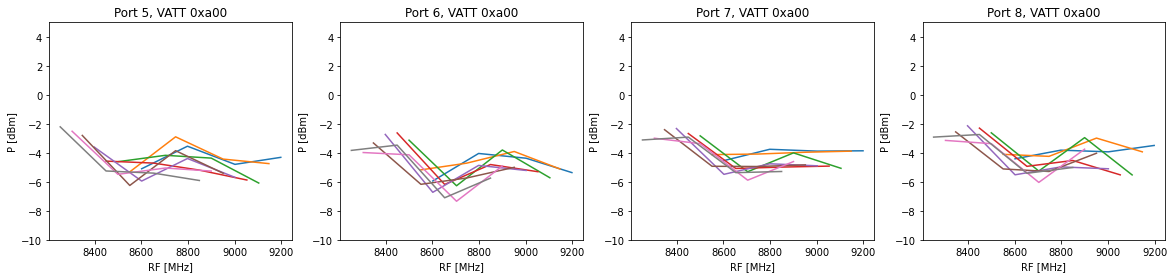

In [101]:
def plot_aaabbb(l, m, n):
    fig = plt.figure(figsize=(20,4))
    axs = [fig.add_subplot(1,4,i+1) for i in range(4)]
    for i, j in zip(m,n):
        with open('../QuBE_Char/e7awg_sw/QubeRiken{}_Port{}.pickle'.format(l,i), 'rb') as f:
            data = pickle.load(f)
        c = convert_plottable(data)
        b = np.array([[Marker.find_peaks(c['TRACE'][i,j,:,:])[:,-1] for j, fi in enumerate(c['IF'][i,:])] for i, fl in enumerate(c['LO'])])
        ax = axs[j]
        for k, fl in enumerate(c['IF'][0,:]):
            ax.set_title('Port {}, VATT {}'.format(i, hex(data[0]['VATT'])))
            ax.plot(b[:,k,0], b[:,k,1])
            ax.set_ylim(-10,5)
            ax.set_xlabel('RF [MHz]')
            ax.set_ylabel('P [dBm]')
        #axs[-1].legend(c['IF'],loc = "upper center", ncol = 3, mode="expand")
    plt.show()

for l, m, n in [
    ('15',[5,6,7,8],[0,1,2,3]),
]:
    print('QuBE Riken #{}'.format(l))
    plot_aaabbb(l, m, n)